Import the library

In [1]:
from carculator import *

Load the default car parameters

In [2]:
cip = CarInputParameters()

Define the calculation mode: static or stochastic(number of iterations)

In [3]:
cip.static()

Fill-in the array that will be used to create the car models

In [4]:
dcts, array = fill_xarray_from_input_parameters(cip)

We can check the powertrains, sizes and yers considered

In [12]:
list(array.powertrain.values)

['BEV',
 'FCEV',
 'HEV-p',
 'ICEV-d',
 'ICEV-g',
 'ICEV-p',
 'PHEV',
 'PHEV-c',
 'PHEV-e']

In [15]:
list(array.year.values)

[2017, 2040]

We can create now the car models, using the default parameters, while specifying a driving cycle

In [35]:
cm = CarModel(array, cycle='WLTC')

Alternatively, we can override specific parameters value, by passing a dicitonary or a filepath to an Excel file.
For we wan to lower the lifetime of the car:

In [44]:
dict_param = {('Driving', 'all', 'all', 'lifetime kilometers', 'none'): {(2017, 'loc'): 150000, (2040, 'loc'): 150000}}
modify_xarray_from_custom_parameters(dict_param, array)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

Let's look at the Tank-to-wheel energy, for a Large diesel

In [46]:
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([2609.00601431, 1733.878351  ])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

Or we indicate a filepath to the Excel file that contains customized values

In [49]:
fp = r'C:\Users\romai\Documents\Notebooks\template_workbook.xlsx'
modify_xarray_from_custom_parameters(fp, array)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

In [50]:
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([3026.34611736, 1988.54687143])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

We can also change the driving cycle, among those offered:
* WLTC
* WLTC 3.1
* WLTC 3.2
* WLTC 3.3
* WLTC 3.4
* CADC Urban
* CADC Road
* CADC Motorway
* CADC Motorway 130
* CADC
* NEDC

In [51]:
cm = CarModel(array, cycle='CADC')
cm.set_all()
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([3466.83381274, 2357.58197706])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

Or even add our own driving cycle

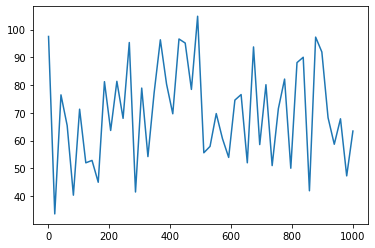

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1, 1000)
def f(x):
    return np.sin(x) + np.random.normal(scale=20, size=len(x)) + 70
plt.plot(x, f(x))

In [9]:
cycle = f(x)
cm = CarModel(array, cycle=cycle)
cm.set_all()
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([13262.52115506,  9774.55145091])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

We can plot any attributes of the car models

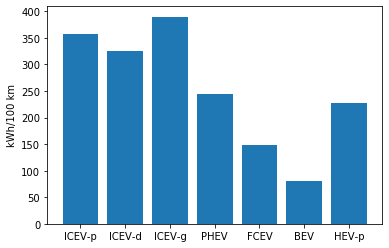

In [10]:
TtW_energy = cm.array.sel(size='SUV', year=2017, parameter='TtW energy', value=0) * 1/3600 * 100

plt.bar(TtW_energy.powertrain, TtW_energy)
plt.ylabel('kWh/100 km')
plt.show()